In [1]:
##### importing data and libraries ######
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
f=open('guns-Copie.csv')
file = pd.read_csv(f)
print (file.head())
print('***********')
print (file.shape)
print('***********')
print(file.columns.values)
print('***********')
print(file.index.values)

# all data is stuck in one single column.

  "","year","month","intent","police","sex","age","race","hispanic","place","education"
0  "1",2012,"01","Suicide",0,"M",34,"Asian/Pacifi...                                   
1  "2",2012,"01","Suicide",0,"F",21,"White",100,"...                                   
2  "3",2012,"01","Suicide",0,"M",60,"White",100,"...                                   
3  "4",2012,"02","Suicide",0,"M",64,"White",100,"...                                   
4  "5",2012,"02","Suicide",0,"M",31,"White",100,"...                                   
***********
(100798, 1)
***********
['"","year","month","intent","police","sex","age","race","hispanic","place","education"']
***********
[     0      1      2 ... 100795 100796 100797]


In [3]:
# extracting the name of the columns

header = file.columns.values[0].split('","')[1:]
print (header)
header[-1]='education'
print (header)

['year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education"']
['year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education']


In [3]:
######## Data Cleaning ###########

col = file.iloc[:,0].str.split(',')
print (col.head())
print('*************')
year=[i[1] for i in col]
month=[i[2] for i in col]
intent=[i[3] for i in col]
police=[i[4] for i in col]
sex=[i[5] for i in col]
age=[i[6] for i in col]
race=[i[7] for i in col]
hispanic=[i[8] for i in col]
place=[i[9] for i in col]
education=[i[10] for i in col]

#print (education[0:5])


0    ["1", 2012, "01", "Suicide", 0, "M", 34, "Asia...
1    ["2", 2012, "01", "Suicide", 0, "F", 21, "Whit...
2    ["3", 2012, "01", "Suicide", 0, "M", 60, "Whit...
3    ["4", 2012, "02", "Suicide", 0, "M", 64, "Whit...
4    ["5", 2012, "02", "Suicide", 0, "M", 31, "Whit...
Name: "","year","month","intent","police","sex","age","race","hispanic","place","education", dtype: object
*************


In [4]:
# turning the data into a dataframe
guns=pd.DataFrame({'year':year,'month':month,'intent':intent,'police':police,'sex':sex,'age':age,\
                   'race':race,'hispanic':hispanic,'place':place,'education':education})
print(guns.head())
print(guns.shape)
print(guns.dtypes)

   year month     intent police  sex age                      race hispanic  \
0  2012  "01"  "Suicide"      0  "M"  34  "Asian/Pacific Islander"      100   
1  2012  "01"  "Suicide"      0  "F"  21                   "White"      100   
2  2012  "01"  "Suicide"      0  "M"  60                   "White"      100   
3  2012  "02"  "Suicide"      0  "M"  64                   "White"      100   
4  2012  "02"  "Suicide"      0  "M"  31                   "White"      100   

               place       education  
0             "Home"           "BA+"  
1           "Street"  "Some college"  
2  "Other specified"           "BA+"  
3             "Home"           "BA+"  
4  "Other specified"        "HS/GED"  
(100798, 10)
year         object
month        object
intent       object
police       object
sex          object
age          object
race         object
hispanic     object
place        object
education    object
dtype: object


In [5]:
# removing the ('')
print (guns.head())
guns=guns.applymap(lambda x: x.replace('"', ''))
print(guns.head())
#print(guns.dtypes)


   year month     intent police  sex age                      race hispanic  \
0  2012  "01"  "Suicide"      0  "M"  34  "Asian/Pacific Islander"      100   
1  2012  "01"  "Suicide"      0  "F"  21                   "White"      100   
2  2012  "01"  "Suicide"      0  "M"  60                   "White"      100   
3  2012  "02"  "Suicide"      0  "M"  64                   "White"      100   
4  2012  "02"  "Suicide"      0  "M"  31                   "White"      100   

               place       education  
0             "Home"           "BA+"  
1           "Street"  "Some college"  
2  "Other specified"           "BA+"  
3             "Home"           "BA+"  
4  "Other specified"        "HS/GED"  
   year month   intent police sex age                    race hispanic  \
0  2012    01  Suicide      0   M  34  Asian/Pacific Islander      100   
1  2012    01  Suicide      0   F  21                   White      100   
2  2012    01  Suicide      0   M  60                   White      10

In [6]:
# conversion of the type of columns
guns['police']=guns['police'].astype(int)
guns['year']=guns['year'].astype(int)
guns['month']=guns['month'].astype(int)
print(guns.dtypes)


year          int32
month         int32
intent       object
police        int32
sex          object
age          object
race         object
hispanic     object
place        object
education    object
dtype: object


In [7]:
ga=guns['age'].value_counts()
# guns['age']=guns['age'].astype(float)
# getting an error as: ValueError: could not convert string to float: 'NA'
# print(ga)
# guns['age'].isnull()


In [8]:
# defining 'NA' elements as numpy.nan
guns.loc[guns['age']=='NA','age'] = np.nan 
print (guns.loc[guns['age'].isna(),'age'] )
guns['age']=guns['age'].astype(float)
print(guns.dtypes)

9        NaN
8153     NaN
25596    NaN
35447    NaN
35448    NaN
35449    NaN
35450    NaN
35451    NaN
35504    NaN
38945    NaN
54190    NaN
54511    NaN
54984    NaN
55459    NaN
72825    NaN
73656    NaN
78996    NaN
92860    NaN
Name: age, dtype: object
year           int32
month          int32
intent        object
police         int32
sex           object
age          float64
race          object
hispanic      object
place         object
education     object
dtype: object


In [9]:
print(guns.head())

   year  month   intent  police sex   age                    race hispanic  \
0  2012      1  Suicide       0   M  34.0  Asian/Pacific Islander      100   
1  2012      1  Suicide       0   F  21.0                   White      100   
2  2012      1  Suicide       0   M  60.0                   White      100   
3  2012      2  Suicide       0   M  64.0                   White      100   
4  2012      2  Suicide       0   M  31.0                   White      100   

             place     education  
0             Home           BA+  
1           Street  Some college  
2  Other specified           BA+  
3             Home           BA+  
4  Other specified        HS/GED  


In [10]:
# applying 'value_counts' on columns

print(guns['year'].value_counts())
print('***********************')
print(guns['month'].value_counts())
print('***********************')
print(guns['race'].value_counts())
print('***********************')
print(guns['intent'].value_counts())
print('***********************')
print(guns['place'].value_counts())
print('***********************')
print(guns['education'].value_counts())


2013    33636
2014    33599
2012    33563
Name: year, dtype: int64
***********************
7     8989
8     8783
6     8677
5     8669
9     8508
4     8455
12    8413
10    8406
3     8289
1     8273
11    8243
2     7093
Name: month, dtype: int64
***********************
White                             66237
Black                             23296
Hispanic                           9022
Asian/Pacific Islander             1326
Native American/Native Alaskan      917
Name: race, dtype: int64
***********************
Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
NA                  1
Name: intent, dtype: int64
***********************
Home                       60486
Other specified            13751
Street                     11151
Other unspecified           8867
Trade/service area          3439
NA                          1384
School/instiution            671
Farm                         470
Industrial/construction      248
Residential institut

In [11]:
########### Second Dataset ############### : ###### the proportion of each race in the US ##############

file = [['Id', 'Year', 'Id', 'Sex', 'Id', 'Hispanic Origin', 'Id', 'Id2', 'Geography', 'Total', 'Race Alone - White', 'Race Alone - Hispanic', 'Race Alone - Black or African American', 'Race Alone - American Indian and Alaska Native', 'Race Alone - Asian', 'Race Alone - Native Hawaiian and Other Pacific Islander', 'Two or More Races'], \
          ['cen42010', 'April 1, 2010 Census', 'totsex', 'Both Sexes', 'tothisp', 'Total', '0100000US', '', 'United States', '308745538', '197318956', '44618105', '40250635', '3739506', '15159516', '674625', '6984195']]

census = pd.DataFrame(file,columns=file[0])
print(census.shape)
census=census.drop([0])
census


# the first dataset gives us only the total number of gun deaths by race in the US.
# knowing the proportion of each race in the US will help to get the rate of gun deaths per 100000 people of each race.

# Question:
# Calculate the rate of gun deaths per 100000 people in each race by (the population of each race)
   # ps:In the case of Asian/Pacific Islander, you'll need to add the counts from census\
   # for Race Alone - Asian, and Race Alone - Native Hawaiian and Other Pacific Islander.

(2, 17)


,Id,Year,Id,Sex,Id,Hispanic Origin,Id,Id2,Geography,Total,Race Alone - White,Race Alone - Hispanic,Race Alone - Black or African American,Race Alone - American Indian and Alaska Native,Race Alone - Asian,Race Alone - Native Hawaiian and Other Pacific Islander,Two or More Races
1,cen42010,"April 1, 2010 Census",totsex,Both Sexes,tothisp,Total,0100000US,,United States,308745538,197318956,44618105,40250635,3739506,15159516,674625,6984195


In [13]:
# how many gun deaths happened in each year.
print(guns['year'].value_counts())


2013    33636
2014    33599
2012    33563
Name: year, dtype: int64


In [14]:
# it looks like gun deaths didn't change much by year from 2012 to 2014.
# let's see if gun deaths in the US change by month and year.

print(guns.groupby(['year','month']).size())
grouped_year_month_data = guns.groupby(['year','month']).size()
#print(grouped_year_month_data[2012])


year  month
2012  1        2758
      2        2357
      3        2743
      4        2795
      5        2999
      6        2826
      7        3026
      8        2954
      9        2852
      10       2733
      11       2729
      12       2791
2013  1        2864
      2        2375
      3        2862
      4        2798
      5        2806
      6        2920
      7        3079
      8        2859
      9        2742
      10       2808
      11       2758
      12       2765
2014  1        2651
      2        2361
      3        2684
      4        2862
      5        2864
      6        2931
      7        2884
      8        2970
      9        2914
      10       2865
      11       2756
      12       2857
dtype: int64


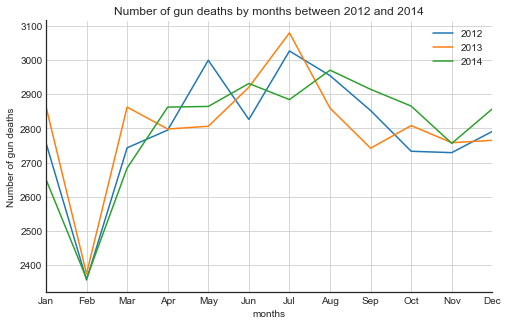

In [15]:
fig,ax=plt.subplots(figsize=(8,5))
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for i in range(2012,2015):
    ax.plot(months,grouped_year_month_data[i].values,label= str(i))

ax.legend()
ax.grid()
ax.set_xlim(months[0], months[11])
ax.tick_params(left=False,bottom=False)
ax.set_title('Number of gun deaths by months between 2012 and 2014')
ax.set_xlabel("months")
ax.set_ylabel('Number of gun deaths')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# findings: 
# it seems that gun deaths increase in the summer and decrease in the winter
# ['July','August']: a peak of gun deaths.
# ['February']:a low point of gun deaths.


In [16]:
# number of gun deaths by race.
print(guns['race'].value_counts())
print('***********************')
# number of female/male deaths 
print(guns['sex'].value_counts())
print('***********************')
# number of gun deaths in the dataset by 'intent'
print(guns['intent'].value_counts())
print('***********************')

White                             66237
Black                             23296
Hispanic                           9022
Asian/Pacific Islander             1326
Native American/Native Alaskan      917
Name: race, dtype: int64
***********************
M    86349
F    14449
Name: sex, dtype: int64
***********************
Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
NA                  1
Name: intent, dtype: int64
***********************


Asian_Pacific_Islander      8.37
Hispanic                   20.22
Native_American_Alaskan    24.52
White                      33.57
Black                      57.88
dtype: float64


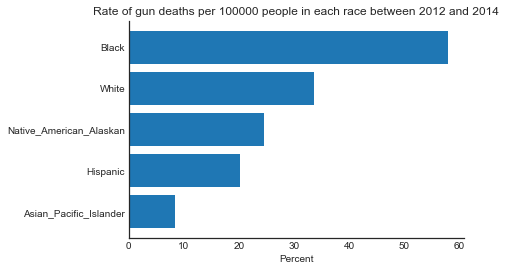

In [17]:
# Calculating the rate of gun deaths in each race
   # ps: Asian/Pacific Islander is the sum of the counts :
   # Race Alone - Asian, and Race Alone - Native Hawaiian and Other Pacific Islander.

#print(census)
#print(census.dtypes)

Asian_pac = int(census.loc[1,'Race Alone - Asian'])+int(census.loc[1,'Race Alone - Native Hawaiian and Other Pacific Islander'])


White = (guns['race'].value_counts()['White']/int(census.loc[1,'Race Alone - White'])*100000).round(2)
Black = (guns['race'].value_counts()['Black']/int(census.loc[1,'Race Alone - Black or African American'])*100000).round(2)
Hispanic = (guns['race'].value_counts()['Hispanic']/int(census.loc[1,'Race Alone - Hispanic'])*100000).round(2)
Asian_Pacific_Islander =(guns['race'].value_counts()['Asian/Pacific Islander']/Asian_pac*100000).round(2)
Native_American_Alaskan=(guns['race'].value_counts()['Native American/Native Alaskan']/int(census.loc[1,'Race Alone - American Indian and Alaska Native'])*100000).round(2)

data = {'White':White,'Black':Black,'Hispanic':Hispanic,'Asian_Pacific_Islander':Asian_Pacific_Islander,'Native_American_Alaskan':Native_American_Alaskan}
data = pd.Series(data).sort_values()

# Visualisation
fig,ax=plt.subplots()
ax.barh(y=data.index,width=data)
ax.tick_params(left=False,bottom=False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel('Percent')
ax.set_title('Rate of gun deaths per 100000 people in each race between 2012 and 2014')

print (data)

# findings: 
# the number of gun deaths affects more the black people 57,88 %.
# the lowest gun death rate goes to 'Asian_Pacific_Islander' race, 8,37 %. 


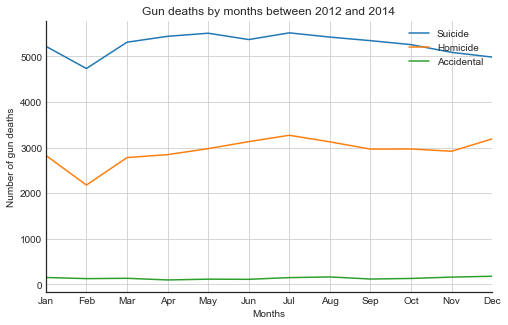

In [18]:
# is there a link between 'month' and 'intent'.

fig,ax=plt.subplots(figsize=(8,5))
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for i in ['Suicide','Homicide','Accidental']:
    deaths_gr = guns.loc[guns['intent']==i].groupby(['month']).size()
    ax.plot(months,deaths_gr.values,label= str(i))

ax.legend(loc='upper right')
ax.grid()
ax.set_xlim(months[0], months[11])
ax.tick_params(left=False,bottom=False)
ax.set_title('Gun deaths by months between 2012 and 2014')
ax.set_xlabel("Months")
ax.set_ylabel('Number of gun deaths')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# findings: 
# The graph shows that suicide is the main cause of gun deaths, in front of homicides and accidents.
# It seems that gun deaths for suicidal and murderous reasons tend to be high in summer and low in winter.
# The number of accidental gun deaths remains stable throughout the year and relatively low,
# compared to the number of gun deaths for suicidal and murderous reasons.

M    85710
F    14280
Name: sex, dtype: int64


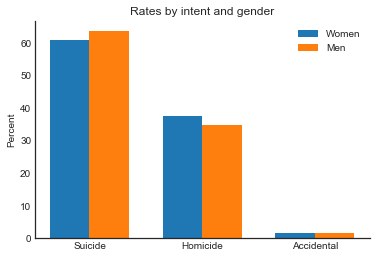

In [19]:
############### Exploring the rates of each 'intents' by gender and race.


# we remove rows basing on the unspecified intents ('Undetermined': 807, 'NA':1) :
filtred_data = guns.loc[-guns['intent'].isin(['NA','Undetermined'])]

# grouping data by 'gender' and 'intent':
intent_gr = filtred_data.groupby(['sex','intent'])

# finding the count of female/male:
tot_gender=filtred_data['sex'].value_counts()

print (tot_gender)
#print(intent_gr.size())

female = ((intent_gr.size()['F'].sort_values(ascending=False))/tot_gender['F']*100).round(2)
male = ((intent_gr.size()['M'].sort_values(ascending=False))/tot_gender['M']*100).round(2)


# Visualisation
fig,ax=plt.subplots()

ind = np.arange(3) 
width = 0.35       
ax.bar(ind, female, width, label='Women')
ax.bar(ind + width, male, width,label='Men')

ax.set_ylabel('Percent')
ax.set_title('Rates by intent and gender')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['Suicide','Homicide','Accidental'])

ax.legend(loc='best')

ax.tick_params(left=False,bottom=False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# findings: 
# The graph indicates that about 60% of gun deaths came from suicide. Accidental gun deaths barely represent 4%.
# Suicide and homicide are the most significant causes of US gun deaths between 2012 and 2014.
# Suicide gun deaths rate are higher among men than women
# More women than men have been murdered by gun.
# The rate of men who were accidentally killed by guns is close to that of women.


In [20]:
# restricting data to the suicide intent to explore more. 
suicide_data = filtred_data.loc[guns['intent']=='Suicide'].drop('intent',axis=1)
print (suicide_data.head())
print (suicide_data.shape)
print (suicide_data['age'].describe())

# findings: 
# The youngest to commit suicide was 9 years old.
# The oldest to commit suicide was 102 years old.
# The average age of people committing suicide was 50 years old.

   year  month  police sex   age                    race hispanic  \
0  2012      1       0   M  34.0  Asian/Pacific Islander      100   
1  2012      1       0   F  21.0                   White      100   
2  2012      1       0   M  60.0                   White      100   
3  2012      2       0   M  64.0                   White      100   
4  2012      2       0   M  31.0                   White      100   

             place     education  
0             Home           BA+  
1           Street  Some college  
2  Other specified           BA+  
3             Home           BA+  
4  Other specified        HS/GED  
(63175, 9)
count    63168.000000
mean        50.310917
std         19.202806
min          9.000000
25%         35.000000
50%         51.000000
75%         64.000000
max        102.000000
Name: age, dtype: float64


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

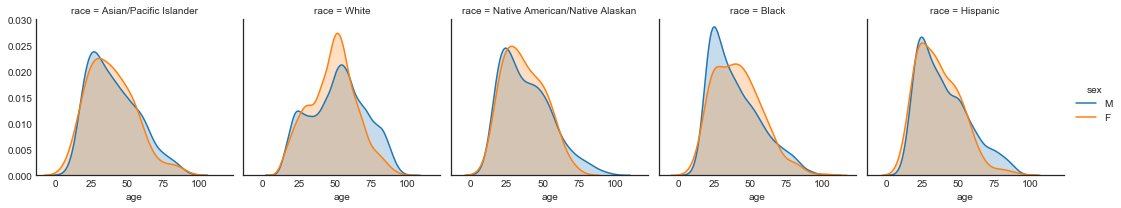

In [21]:
# The 'age' distribution for each race.
sns.set_style('white')
g=sns.FacetGrid(suicide_data,col='race',hue='sex')
g.map(sns.kdeplot,'age',shade=True)
g.add_legend()
sns.despine


race                            sex
Asian/Pacific Islander          F         99
                                M        646
Black                           F        364
                                M       2968
Hispanic                        F        347
                                M       2824
Native American/Native Alaskan  F         62
                                M        493
White                           F       7817
                                M      47555
dtype: int64
{'White': sex
F    11.91
M    72.44
dtype: float64, 'Black': sex
F     1.57
M    12.81
dtype: float64, 'Hispanic': sex
F     3.88
M    31.55
dtype: float64, 'Asian_Pacific_Islander': sex
F     7.52
M    49.09
dtype: float64, 'Native_American_Alaskan': sex
F     6.87
M    54.60
dtype: float64}


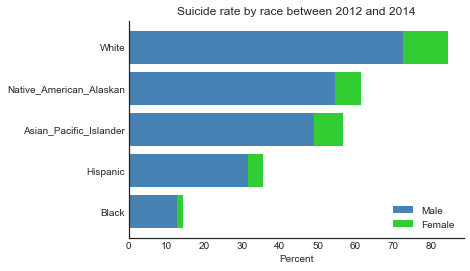

In [22]:
# Calculating the suicide rate for each race 

# grouping suicide_data by 'race' and 'gender': 
suicide_by_race = suicide_data.groupby(['race','sex']).size()
print (suicide_by_race)

# calculating the suicide rate for each race:
White = (suicide_by_race['White']/filtred_data['race'].value_counts()['White']*100).round(2)
Black = (suicide_by_race['Black']/filtred_data['race'].value_counts()['Black']*100).round(2)
Hispanic = (suicide_by_race['Hispanic']/filtred_data['race'].value_counts()['Hispanic']*100).round(2)
Asian_Pacific_Islander =(suicide_by_race['Asian/Pacific Islander']/filtred_data['race'].value_counts()['Asian/Pacific Islander']*100).round(2)
Native_American_Alaskan=(suicide_by_race['Native American/Native Alaskan']/filtred_data['race'].value_counts()['Native American/Native Alaskan']*100).round(2)

suicide_rates = {'White':White,'Black':Black,'Hispanic':Hispanic,'Asian_Pacific_Islander':Asian_Pacific_Islander,'Native_American_Alaskan':Native_American_Alaskan}
print (suicide_rates)

# Visualization:

color_palette_list = ['#4682B4', '#32CD32', '#FFA500']
line={}
fig,ax=plt.subplots()

for race,i in enumerate ([Black,Hispanic,Asian_Pacific_Islander,Native_American_Alaskan,White]):
    line[race]=ax.barh(y=str(i),width=i['M'],color=color_palette_list[0])
    line[race+4]=ax.barh(y=str(i),width=i['F'],left=i['M'],color=color_palette_list[1])

ax.tick_params(left=False,bottom=False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel('Percent')
ax.set_title('Suicide rate by race between 2012 and 2014')
ax.set_yticklabels(['Black','Hispanic','Asian_Pacific_Islander','Native_American_Alaskan','White'])

ax.legend([line[0],line[5]], ['Male', 'Female'], loc='lower right')

# findings: 
# suicide gun deaths rate is significantly high among the white race, 84,35 % of gun deaths came from suicide.
# the native american alaskan race comes secondly with 61,47 %.
# Men tend to commit suicide with a gun much more significantly than women.


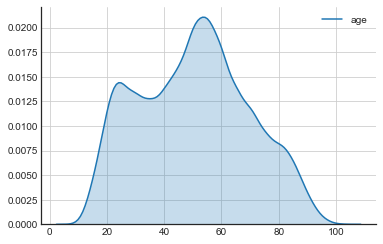

In [23]:
# The 'age' distribution for gun deaths.

sns.set_style('white')
suicide_data.loc[suicide_data['age'].isna()==False,'age']
g=sns.kdeplot(suicide_data.loc[suicide_data['age'].isna()==False,'age'],shade=True)
sns.despine()
g.grid()


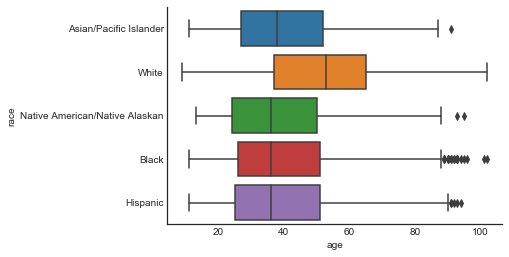

In [24]:
sns.set_style('white')
g = sns.boxplot(y="race", x="age", data=suicide_data.loc[suicide_data['age'].isna()==False])
sns.despine()

# findings : 
# the median age of a white person suicided by gun is higher than that of other races.
# a white person tends to commit suicide at the age of 50, while it is around 38 among other races.
# the age of gun deaths among the white race seems to be normally distributed.
# whereas it tends to be positively skewed for other races.

# the interquartile ranges are reasonably similar for all the races.
# though the overall range of the suicided data set is greater for the white race.

# outliers are numerous among the black race.

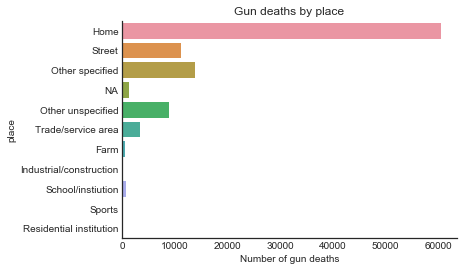

In [25]:
# Where did most gun deaths occur?

fig=plt.figure()

g=sns.countplot(y="place", data=guns)
g.set(xlabel="Number of gun deaths")
g.set_title('Gun deaths by place')
sns.despine()

# at home is where the majority of gun deaths occurred the most.

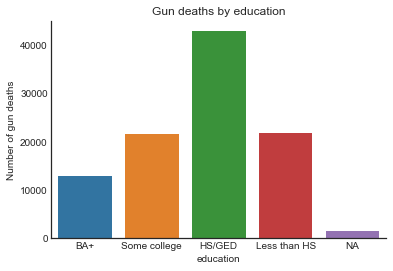

In [26]:
# is there a link between 'education' and gun deaths ?

fig=plt.figure()

g=sns.countplot(x="education", data=guns)
g.set(ylabel="Number of gun deaths")
g.set_title('Gun deaths by education')
sns.despine()

# education and gun deaths are inversely proportional, gun deaths are high among the less educated.

race
Asian/Pacific Islander             30
Black                             356
Hispanic                          282
Native American/Native Alaskan     25
White                             709
dtype: int64
1402


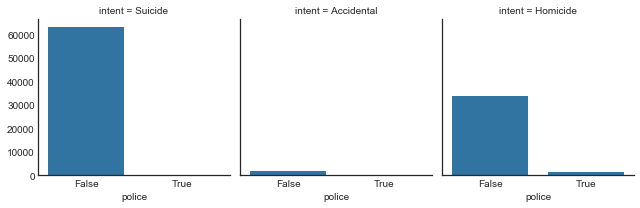

In [70]:
# was the police involved during the shooting ?

sns.set_style('white')
g=sns.FacetGrid(filtred_data,col='intent')
g.map(sns.countplot,'police',order=[0,1])
g.set_xticklabels(['False','True'])

print (filtred_data.loc[filtred_data['police']==1].groupby(['race']).size())
print (filtred_data.loc[filtred_data['police']==1].groupby(['race']).size().sum())

# The police were involved in 1402 shooting cases, half of the victims were white.

In [72]:
# print(guns['hispanic'].value_counts())
